# Practical work 1 : MLP

## Import libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Tools

In [4]:
# Generates random data (3 classes)
def generate_data_3classes(n1,n2,n3, display=True):
    X1 = np.random.randn(n1,2)*0.15 - np.array([0.2 , 0.2])
    X2 = np.random.randn(n2,2)*0.25 + np.array([0.1 , 0.5])
    X3 = np.random.randn(n3,2)*0.15 + np.array([0.6 , 0.2])
    X = np.concatenate((X1,X2,X3), axis=0)
    Y = np.concatenate([np.ones(n1), np.ones(n2)*2, np.ones(n3)*3])-1

    if display:
        plt.plot(X1[:,0], X1[:,1], '.r')
        plt.plot(X2[:,0], X2[:,1], '.g')
        plt.plot(X3[:,0], X3[:,1], '.b')
        plt.show()

    return X,Y

# Converts a class vector (integers) to binary class matrix
def to_categorical(y, num_classes=None, dtype="float32"):
    y = np.array(y, dtype="int")
    input_shape = y.shape
    if input_shape and input_shape[-1] == 1 and len(input_shape) > 1:
        input_shape = tuple(input_shape[:-1])
    y = y.ravel()
    if not num_classes:
        num_classes = np.max(y) + 1
    n = y.shape[0]
    categorical = np.zeros((n, num_classes), dtype=dtype)
    categorical[np.arange(n), y] = 1
    output_shape = input_shape + (num_classes,)
    categorical = np.reshape(categorical, output_shape)
    return categorical

# plot the classifier boundaries
def plot_boundaries( x, W, b, y ):
    """
    Parameters
    ----------
    x: np.ndarray
        array of training/testing samples
    W: np.ndarray
        network weight matrix
    b: np.ndarray()
        network weights
    y: np.ndarray
        samples labels (array of int)

    Example
    -------
    X_train, Y_train = generate_data_3classes(100, 200, 150)
    K = 3                      # classes number
    D = 2                      # samples dimension
    W = 1 * np.random.normal( size=( D, K ) )
    b = np.zeros( ( 1, K ) )
    plot_boundaries( X_train, W, b, Y_train )
    """
    h = 0.02
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid( np.arange( x_min, x_max, h ), np.arange( y_min, y_max, h ) )

    Z = np.dot( np.c_[xx.ravel(), yy.ravel()], W ) + b
    Z = np.argmax( Z, axis=1 )
    Z = Z.reshape( xx.shape )

    plt.contourf( xx, yy, Z, cmap=plt.cm.RdYlBu )    
    plt.scatter( x[:, 0], x[:, 1], c=y, s=20, cmap=plt.cm.RdYlBu )
    plt.title('Decision boundary')
    plt.xlim( xx.min(), xx.max() )
    plt.ylim( yy.min(), yy.max() )

## Training data generation 

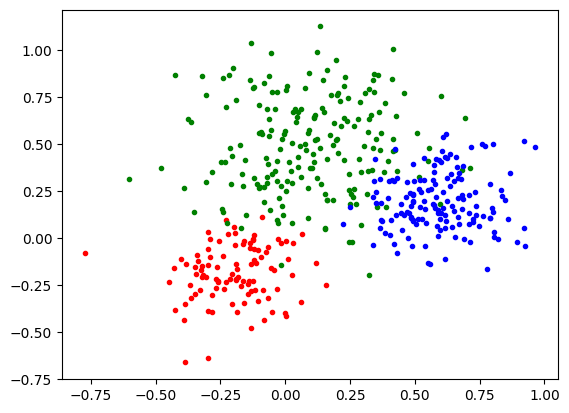

K=3, num_example=450, dimension=2


In [5]:
X_train, Y_train = generate_data_3classes(100, 200, 150)
Y_train_cat = to_categorical(Y_train)

K = Y_train_cat.shape[1] #nombre de classes
( num_examples, D ) = X_train.shape # nombre d'exemples et dimension des exemples
print( f"K={K}, num_example={num_examples}, dimension={D}")

In [6]:
# sigmoid function
def sigmo(v):
	return 1/ ( 1 + np.exp(-v) )

# sigmoid function derivative
def sigmop(v):
	x = sigmo(v)
	return x - x*x

## Training stage

(2, 3)
(450, 2)


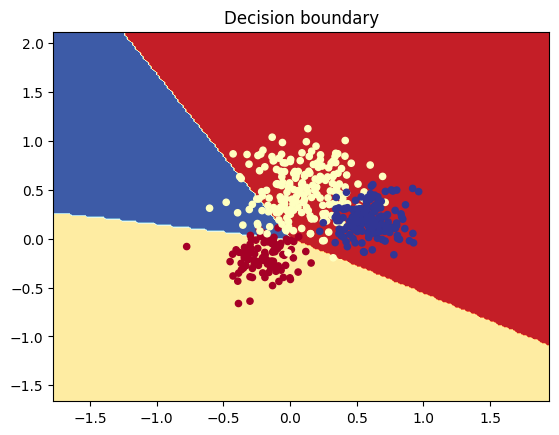

In [7]:
# weights random initialization
W = 1 * np.random.normal( size=( D, K ) )
b = np.zeros( ( 1, K ) )
plot_boundaries( X_train, W, b, Y_train )

# learning parameters
step_size = 1e-1
iter_number = 10000
print(np.shape(W))
print(np.shape(X_train))

In [8]:
# Network learning
X = X_train
Y = Y_train
Y_cat = Y_train_cat
losses = np.zeros( iter_number )

for i in range( iter_number ):
    # forward (propagation)
    v = np.dot(X, W) + b
    Y_pred = sigmo(v)

    Err = (Y_pred-Y_cat)
    losses[i] = np.mean(Err**2)

    if i % 1000 == 0:   
        print(f"iteration {i}: loss {losses[i]}")

    # backward (back-propagation)
    dL_Err  = 2*Err
    dErr_v = sigmop(v)
    dv_W = X

    delta = (dL_Err * dErr_v)
    dL_W =  np.dot(dv_W.T,delta)/num_examples
    dL_b =  np.sum(delta,axis=0, keepdims=True)/num_examples

    W += -step_size * dL_W
    b += -step_size * dL_b

iteration 0: loss 0.3943320659818726
iteration 1000: loss 0.10563197984836599
iteration 2000: loss 0.07397553191633645
iteration 3000: loss 0.06390923618077146
iteration 4000: loss 0.05874675792459607
iteration 5000: loss 0.055541615166611234
iteration 6000: loss 0.05333211360649921
iteration 7000: loss 0.051704169859415006
iteration 8000: loss 0.05044810722503567
iteration 9000: loss 0.049445607579317895


training accuracy: 0.94
training accuracy: 0.94


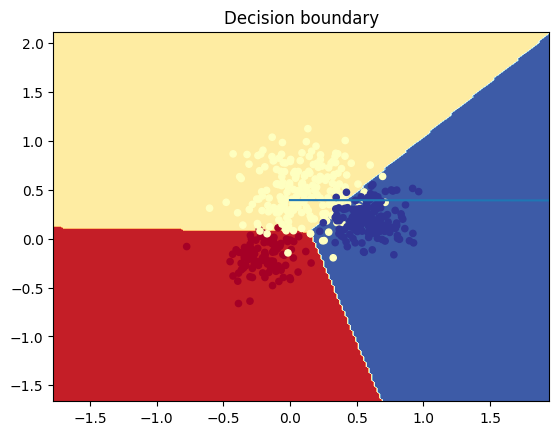

In [9]:
# Loss ploting
plt.plot(losses)

# training accuracy
v = np.dot(X, W) + b
Y_pred = sigmo(v)
class_pred = np.argmax(Y_pred, axis=1)
print('training accuracy: {:.2}'.format(np.mean(class_pred == Y_train)))
print( f"training accuracy: {np.mean(class_pred == Y_train):.2f}" )

plot_boundaries( X_train, W, b, Y_train )

### Testing

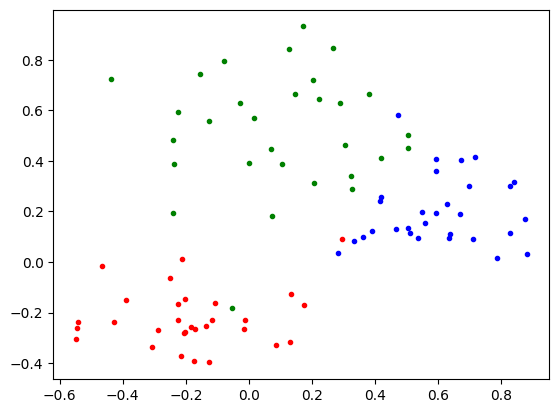

In [10]:
X_test, Y_test = generate_data_3classes(30, 30, 30) 
Y_test_cat = to_categorical( Y_test )

In [11]:
def predict(X,W,b):
    v = np.dot(X, W) + b
    return sigmo(v)

def evaluate(Y_pred, Y):
    class_pred = np.argmax(Y_pred, axis=1)
    print( f"Accuracy: {np.mean(class_pred == Y):.2}" )

In [12]:
Y_train_pred = predict(X_train,W,b)
Y_test_pred = predict(X_test,W,b)
score_train = evaluate(Y_train_pred, Y_train)
score_test = evaluate(Y_test_pred, Y_test)

Accuracy: 0.94
Accuracy: 0.96


# Same example using functions

In [13]:
# Step size
step_size = 1e-1

# Derivative sigmoid function
#def sigmop(v):
#	return v * (1 - v)

# sigmoid function
def sigmo(v):
	return 1/( 1 + np.exp(-v) )

# sigmoid function derivative
def sigmop(v):
	x = sigmo(v)
	return x * (1 - x)

# Calculate the activation of the layer 
def model(X, W, b):
  v = X.dot(W) + b
  Y = sigmo(v)
  return (Y, v)

# The MSE cost function
def mse_loss(Y, Y_cat):
  err = Y - Y_cat
  return 1/len(Y_cat) * np.sum(err**2)

# The derivative of the MSE cost function
def gradients_mse_loss(Y, X, Y_cat):
  err = Y - Y_cat
  dW = 2 * np.dot( X.T, err*sigmop(Y))
  db = 2 * np.sum(err*sigmop(Y), axis= 0)
  return (dW, db)

# Update of the network weights by the gradient decent algorithm 
def update_weights(W, b, dW, db, eps=step_size):
  W = W - eps*dW
  b = b - eps*db
  return (W, b)

# Model prediction: predict the class
def predict(X, W, b):
  Y, _ = model(X, W, b)
  return np.argmax(Y, axis=1) if len(np.unique(Y)) else Y_pred >= 0.5

# Accuracy score
def accuracy_score(y_true, y_pred):
    # Check that arrays have same length
    if len(y_true) != len(y_pred):
        return -1
    
    # Initialiser counter
    correct_count = 0
    
    # count correct predictions
    for true, pred in zip(y_true, y_pred):
        if true == pred:
            correct_count += 1
    
    return correct_count / len(y_true)

In [14]:
def evaluation_neural_network(X, y, W, b, history):
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together
  
  # Make predictions using the trained model
  y_pred = predict(x_in, W, b).reshape(xx.shape)
  
  # Plot decision boundary
  plt.figure(figsize=(20, 5))
  plt.subplot(1, 3, 1)
  plt.plot(history['losses'], label='losses'); plt.legend()
  plt.title('Cost fuction')
  plt.subplot(1, 3, 2)
  plt.plot(history['accuracy'], label='accuracy'); plt.legend()
  plt.title('Accuracy score')
  plt.subplot(1, 3, 3)
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.title('Decision boundary')
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

### Training of the neural network with the MSE cost function 

In [15]:
# Random initialization of weights
W = 1 * np.random.normal(size=(D,K))
b = np.zeros((1,K))

# Learning parameters
step_size = 1e-3
num_iter = 20000

X = X_train
Y = Y_train
Y_cat = Y_train_cat

In [16]:
# dictionary containing future accuracy and losses
history = {'losses' : [],
           'accuracy' : []}

for i in range(num_iter):
  # ==== propagation ==== #

  # State of the neurons
  Y_state, _ = model(X, W, b)
  # MSE loss error
  Loss = mse_loss(Y_state, Y_cat)
  # Save accuracy score and log loss error for each iteration in a dictionary
  history['losses'].append(Loss)
  Y_pred = predict(X, W, b)
  history['accuracy'].append(accuracy_score(Y.flatten(), Y_pred.flatten()))
  
  if i % 1000 == 0:   
    print('iteration {}: loss {}'.format(i, Loss))
      
  # ==== retro-propagation ==== #

  dL_W, dL_b = gradients_mse_loss(Y_state, X, Y_cat)
  W, b =  update_weights(W, b, dL_W, dL_b, eps=step_size) 

iteration 0: loss 0.7865956459150452
iteration 1000: loss 0.1542785959445148
iteration 2000: loss 0.13730724409802694
iteration 3000: loss 0.13147754983270873
iteration 4000: loss 0.12854385805062032
iteration 5000: loss 0.12679003809771391
iteration 6000: loss 0.1256310127660013
iteration 7000: loss 0.12481253957293095
iteration 8000: loss 0.1242064590632526
iteration 9000: loss 0.12374128628241837
iteration 10000: loss 0.12337409054488749
iteration 11000: loss 0.12307758914085609
iteration 12000: loss 0.12283364823540659
iteration 13000: loss 0.12262976632624913
iteration 14000: loss 0.12245705892106919
iteration 15000: loss 0.12230904778757273
iteration 16000: loss 0.12218090425954221
iteration 17000: loss 0.12206896012265225
iteration 18000: loss 0.12197038211524702
iteration 19000: loss 0.12188294971839256


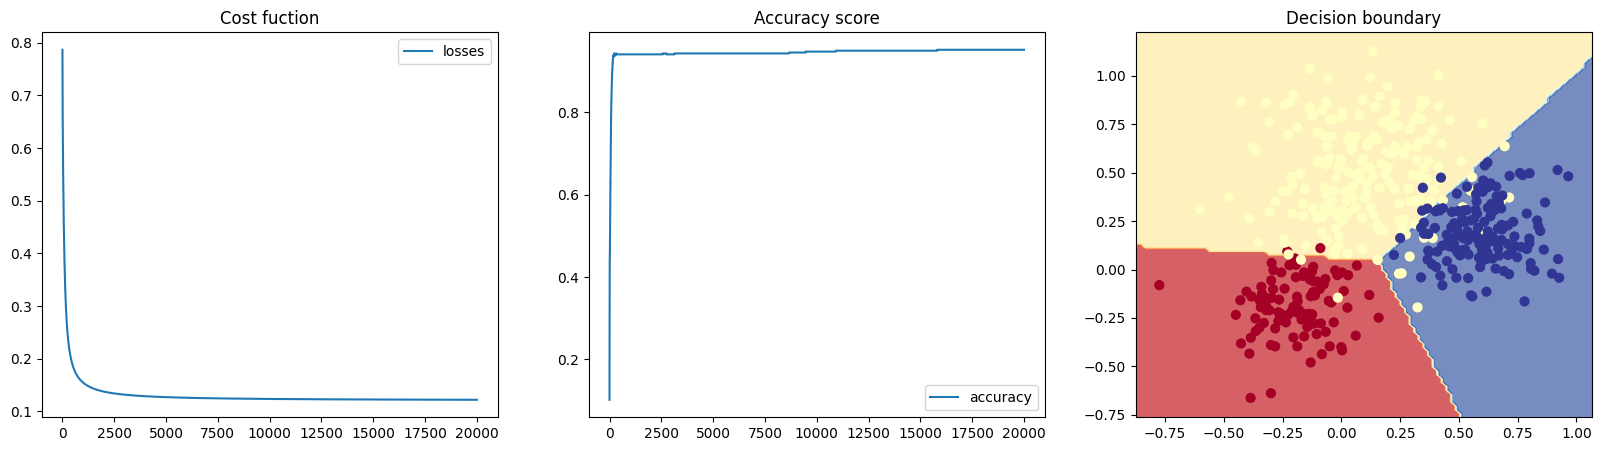

In [17]:
# Evaluation the neural network
evaluation_neural_network(X, Y, W, b, history)

In [18]:
# Calculation of accuracy
Y_pred, _ = model(X, W, b)
class_pred = predict(X, W, b)
print('Training accuracy: {:.2}'.format(np.mean(class_pred == Y_train)))

Training accuracy: 0.95


## MLP - Two hidden layer

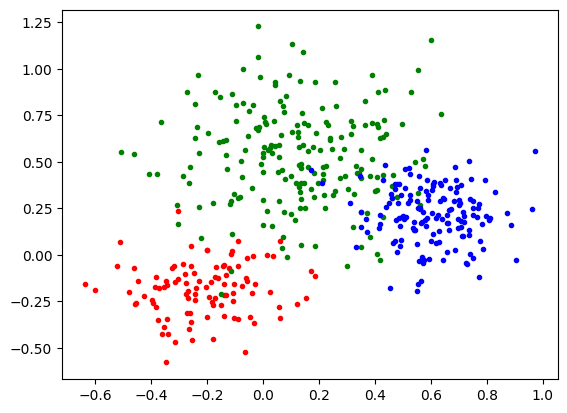

K=3, num_example=450, dimension=2


In [19]:
X_train, Y_train = generate_data_3classes(100, 200, 150)
Y_train_cat = to_categorical(Y_train)

K = Y_train_cat.shape[1] #nombre de classes
( num_examples, D ) = X_train.shape # nombre d'exemples et dimension des exemples
print( f"K={K}, num_example={num_examples}, dimension={D}")

In [20]:
# Random initialization of weights with two hidden layer 
length_hidden_layer = 8
np.random.seed(0)
W1 = np.random.normal(size=(length_hidden_layer, D)),
b1 = np.zeros((length_hidden_layer, 1))
W2 = np.random.normal(size=(K, length_hidden_layer))
b2 = np.zeros((K, 1))

# Learning parameters
step_size = 1e-1
num_iter = 10000

In [21]:
# Forward probagation
def forward_probagation(X, W1, b1, W2, b2):
  Z1 = W1.dot(X.T) + b1
  O1 = sigmo(Z1)
  Z2 = W2.dot(O1) + b2
  O2 = sigmo(Z2)
  outputs = (O1, O2)
  return outputs

# Back propagation
def back_propagation(X, Y_cat, W, outputs):
  m = len(Y_cat)
  dZ2 = outputs[1] - Y_cat.T
  dW2 = 1 / m * dZ2.dot(outputs[0].T)
  db2 = 1 / m * np.sum(dZ2, axis=1, keepdims = True)
  dZ1 = np.dot(W2.T, dZ2) * outputs[0] * (1 - outputs[1])
  dW1 = 1 / m * dZ1.dot(X)
  db1 = 1 / m * np.sum(dZ1, axis=1, keepdims = True)
  gradients = (dW1, db1, dW2, db2)
    
  return gradients

# Update weights
def update_weights(W1, b1, W2, b2, gradients):
  W1 = W1 - step_size * gradients[0]
  b1 = b1 - step_size * gradients[1]
  W2 = W2 - step_size * gradients[2]
  b2 = b2 - step_size * gradients[3]

  return (W1, b1, W2, b2)

In [22]:
# Learning ...